<h1>Frekvenssijakauma</h1>

Frekvenssijakauman voin esittää frekvenssitaulukkona tai pylväskaaviona.

Frekvenssitaulukolla tarkoitan taulukkoa, joka sisältää muuttujan arvojen esiintymiskerrat (frekvenssit) ja esiintymiskertojen prosenttiosuudet.

Seuraavassa malli frekvenssitaulukon ja pylväskaavion laatimiseen Pythonilla.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [2]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# Koulutuksen numeroarvoja [1, 2, 3, 4] vastaavat tekstimuotoiset arvot
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

In [4]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['koulutus'], 'Lukumäärä')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Tekstimuotoiset arvot numeroiden tilalle
df1.index = koulutus

# Prosentit
n = df1['Lukumäärä'].sum()
df1['%'] = (df1['Lukumäärä'] / n) * 100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun tuunaus
df1.style.format({'Lukumäärä' : '{:.0f}', '%' : '{:.1f}'})

,Lukumäärä,%
Peruskoulu,27,33.3
2. aste,30,37.0
Korkeakoulu,22,27.2
Ylempi korkeakoulu,2,2.5
Yhteensä,81,100.0


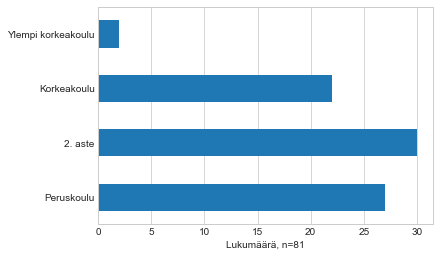

In [5]:
# Vaakapylväskaavio (Yhteensä-rivin tietoja ei oteta mukaan)
ax1 = df1.drop('Yhteensä')['Lukumäärä'].plot.barh()

# x-akselin otsikko (n-arvo laskettu edellisessä solussa)
ax1.set_xlabel('Lukumäärä, n=' + str(n))

# seaborn-whitegrid -tyyli sisältää vaaka- ja pystysuuntaisen taustaviivoituksen
# tässä kumotaan vaakasuuntainen taustaviivoitus
ax1.grid(axis = 'y')

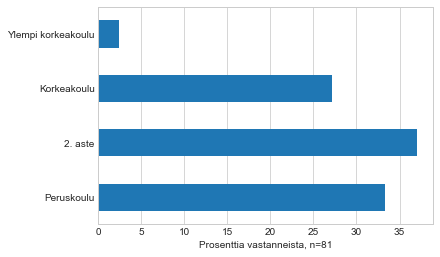

In [6]:
# Vaakapylväskaavio (Yhteensä-rivin tietoja ei oteta mukaan)
ax1 = df1.drop('Yhteensä')['%'].plot.barh()

# x-akselin otsikko (n-arvo laskettu edellisessä solussa)
ax1.set_xlabel('Prosenttia vastanneista, n=' + str(n))

ax1.grid(axis = 'y')

# Kaavion tallentaminen
#plt.savefig('prosenttikaavio.png', bbox_inches='tight')